In [100]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth', None)

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_theme(rc={'figure.figsize': (10, 5)})

from sklearn.model_selection import train_test_split,cross_val_predict,GridSearchCV,RandomizedSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler,RobustScaler,OneHotEncoder,PolynomialFeatures
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as Imb_Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,precision_recall_curve,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,StackingClassifier,VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.decomposition import PCA, IncrementalPCA # till 20K features
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection # >20k features
from sklearn.manifold import LocallyLinearEmbedding, MDS, Isomap, TSNE # Manifold could be better than Projection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # for classfication problems (larg distance between diffrent classes)

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.cluster import HDBSCAN # state of art
from sklearn.metrics import silhouette_score, silhouette_samples # 0 -> 1
from matplotlib.ticker import FixedLocator, FixedFormatter

In [2]:
import pandas as pd

data = {
    "اسم العمود": [
        "age", "job", "marital", "education", "default", "housing", "loan",
        "contact", "month", "day_of_week", "duration", "campaign", "pdays",
        "previous", "poutcome", "emp.var.rate", "cons.price.idx",
        "cons.conf.idx", "euribor3m", "nr.employed", "y"
    ],
    "الشرح بالعربية": [
        "العمر الرقمي للعميل",
        "نوع وظيفة العميل (مثل: موظف إداري، فني، عامل...)",
        "الحالة الاجتماعية (متزوج، أعزب، مطلق...)",
        "المستوى التعليمي (مثل: شهادة جامعية، تعليم أساسي...)",
        "هل لدى العميل تخلف عن سداد قرض سابق؟",
        "هل لدى العميل قرض سكني؟",
        "هل لدى العميل قرض شخصي؟",
        "وسيلة الاتصال المستخدمة (هاتف أرضي أو محمول)",
        "الشهر الذي تم فيه الاتصال",
        "اليوم الذي تم فيه الاتصال بالعميل",
        "مدة المكالمة بالثواني",
        "عدد المرات التي تم فيها الاتصال خلال الحملة الحالية",
        "عدد الأيام منذ آخر اتصال في حملة سابقة (999 = لم يتم الاتصال)",
        "عدد المرات التي تم الاتصال فيها في الحملات السابقة",
        "نتيجة الحملة السابقة (نجاح، فشل، غير موجود)",
        "معدل التغير في التوظيف (مؤشر اقتصادي)",
        "مؤشر أسعار المستهلك (للتضخم)",
        "مؤشر ثقة المستهلكين في الاقتصاد",
        "سعر فائدة يورايبور لمدة 3 أشهر",
        "عدد العاملين (مؤشر اقتصادي)",
        "هل اشترك العميل في وديعة لأجل؟ (نعم أو لا)"
    ]
}

df_columns_description = pd.DataFrame(data)
df_columns_description

اسم العمود  \
0              age   
1              job   
2          marital   
3        education   
4          default   
5          housing   
6             loan   
7          contact   
8            month   
9      day_of_week   
10        duration   
11        campaign   
12           pdays   
13        previous   
14        poutcome   
15    emp.var.rate   
16  cons.price.idx   
17   cons.conf.idx   
18       euribor3m   
19     nr.employed   
20               y   

                                                   الشرح بالعربية  
0                                             العمر الرقمي للعميل  
1                نوع وظيفة العميل (مثل: موظف إداري، فني، عامل...)  
2                        الحالة الاجتماعية (متزوج، أعزب، مطلق...)  
3            المستوى التعليمي (مثل: شهادة جامعية، تعليم أساسي...)  
4                            هل لدى العميل تخلف عن سداد قرض سابق؟  
5                                         هل لدى العميل قرض سكني؟  
6                                         هل لدى العميل قرض شخصي؟  
7                    وسيلة الاتصال المستخدمة (هاتف أرضي أو محمول)  
8                                       الشهر الذي تم فيه الاتصال  
9                               اليوم الذي تم فيه الاتصال بالعميل  
10                                          مدة المكالمة بالثواني  
11            عدد المرات التي تم فيها الاتصال خلال الحملة الحالية  
12  عدد الأيام منذ آخر اتصال في حملة سابقة (999 = لم يتم الاتصال)  
13             عدد المرات التي تم الاتصال فيها في الحملات السابقة  
14                    نتيجة الحملة السابقة (نجاح، فشل، غير موجود)  
15                          معدل التغير في التوظيف (مؤشر اقتصادي)  
16                                   مؤشر أسعار المستهلك (للتضخم)  
17                                مؤشر ثقة المستهلكين في الاقتصاد  
18                                 سعر فائدة يورايبور لمدة 3 أشهر  
19                                    عدد العاملين (مؤشر اقتصادي)  
20                     هل اشترك العميل في وديعة لأجل؟ (نعم أو لا)

In [3]:
df = pd.read_csv('bank-additional-full.csv',sep=';',na_values='unknown')

# Data Understanding

In [4]:
df.head()

age        job  marital    education default housing loan    contact month  \
0   56  housemaid  married     basic.4y      no      no   no  telephone   may   
1   57   services  married  high.school     NaN      no   no  telephone   may   
2   37   services  married  high.school      no     yes   no  telephone   may   
3   40     admin.  married     basic.6y      no      no   no  telephone   may   
4   56   services  married  high.school      no      no  yes  telephone   may   

  day_of_week  duration  campaign  pdays  previous     poutcome  emp.var.rate  \
0         mon       261         1    999         0  nonexistent           1.1   
1         mon       149         1    999         0  nonexistent           1.1   
2         mon       226         1    999         0  nonexistent           1.1   
3         mon       151         1    999         0  nonexistent           1.1   
4         mon       307         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no

In [5]:
df['pdays'] = df['pdays'].replace(999,-1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.isna().mean() * 100

age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

In [8]:

df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593     -0.741988      0.172963   
std       10.42125    259.279249      2.770014      1.510327      0.494901   
min       17.00000      0.000000      1.000000     -1.000000      0.000000   
25%       32.00000    102.000000      1.000000     -1.000000      0.000000   
50%       38.00000    180.000000      2.000000     -1.000000      0.000000   
75%       47.00000    319.000000      3.000000     -1.000000      0.000000   
max       98.00000   4918.000000     56.000000     27.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [9]:
for col in df.select_dtypes('O').columns:
    print(f'{col} : {df[col].nunique()}')
    print(df[col].value_counts())
    print('\n --- \n')

job : 11
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

 --- 

marital : 3
married     24928
single      11568
divorced     4612
Name: marital, dtype: int64

 --- 

education : 7
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

 --- 

default : 2
no     32588
yes        3
Name: default, dtype: int64

 --- 

housing : 2
yes    21576
no     18622
Name: housing, dtype: int64

 --- 

loan : 2
no     33950
yes     6248
Name: loan, dtype: int64

 --- 

contact : 2
cellular     26144
telephone    15044
Name: contact, dtype: int64

 --- 

month : 10
may    13769
jul     7174
aug     61

In [10]:
df.drop(['default','duration'],axis=1,inplace=True)

In [11]:
df.head()

age        job  marital    education housing loan    contact month  \
0   56  housemaid  married     basic.4y      no   no  telephone   may   
1   57   services  married  high.school      no   no  telephone   may   
2   37   services  married  high.school     yes   no  telephone   may   
3   40     admin.  married     basic.6y      no   no  telephone   may   
4   56   services  married  high.school      no  yes  telephone   may   

  day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0         mon         1     -1         0  nonexistent           1.1   
1         mon         1     -1         0  nonexistent           1.1   
2         mon         1     -1         0  nonexistent           1.1   
3         mon         1     -1         0  nonexistent           1.1   
4         mon         1     -1         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no

# Feature Extraction

In [12]:
def get_season(month):
    if month in ['mar', 'apr', 'may']:
        return 'spring'
    elif month in ['jun', 'jul', 'aug']:
        return 'summer'
    elif month in ['sep', 'oct', 'nov']:
        return 'fall'
    else:
        return 'winter'
df['season'] = df['month'].apply(get_season)

In [13]:
df['has_any_loan'] = df.apply(lambda x: 1 if x['housing'] == 'yes' or x['loan'] == 'yes' else 0, axis=1)

In [14]:
df['contacted_before'] = df['pdays'].apply(lambda x: 0 if x == -1 else 1)

In [15]:
df['age_group'] = pd.cut(df['age'],5,labels=['young','adult','middle_aged','senior','elderly'])
df['age_group']

0        middle_aged
1        middle_aged
2              adult
3              adult
4        middle_aged
            ...     
41183         senior
41184          adult
41185    middle_aged
41186          adult
41187         senior
Name: age_group, Length: 41188, dtype: category
Categories (5, object): ['young' < 'adult' < 'middle_aged' < 'senior' < 'elderly']

In [16]:
df["economic_index"] = (
    df["emp.var.rate"] +
    df["cons.price.idx"] +
    df["cons.conf.idx"] +
    df["euribor3m"] +
    df["nr.employed"]
)

In [17]:
def campaign_length(x):
    if x == 1:
        return "short"
    elif 2 <= x <= 4:
        return "medium"
    else:
        return "long"

df["campaign_category"] = df["campaign"].apply(campaign_length)

In [18]:
df["interaction_intensity"] = df.apply(
    lambda row: row["campaign"] / (row["previous"] + 1), axis=1
)

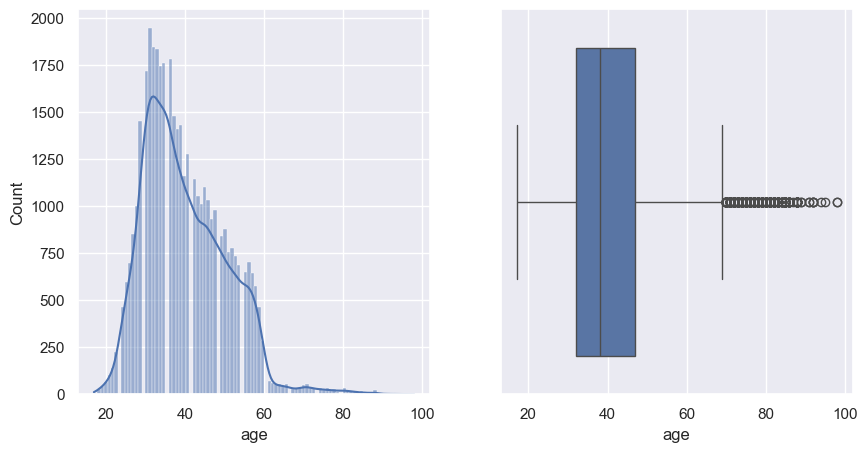

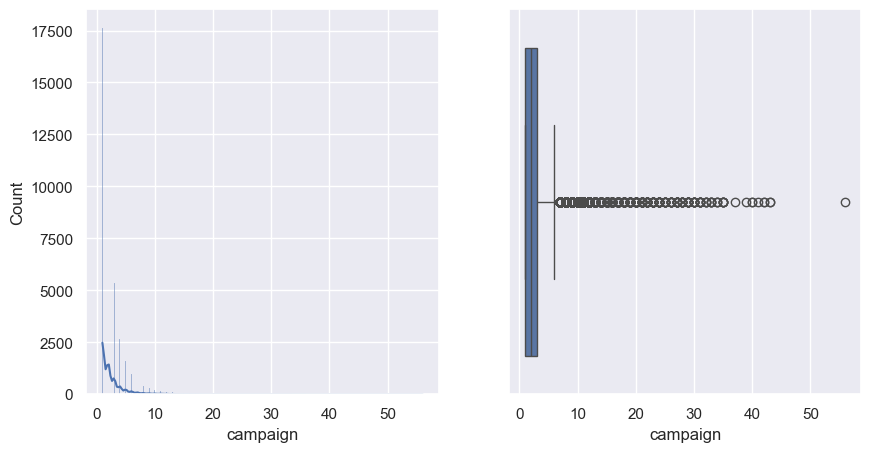

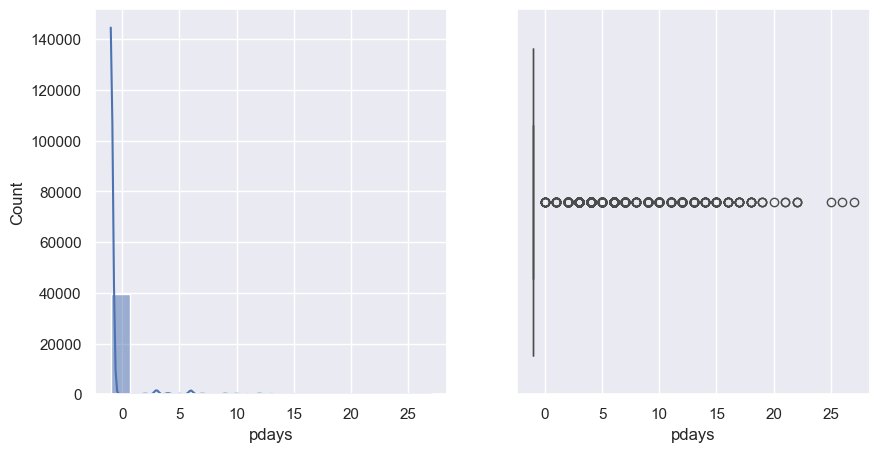

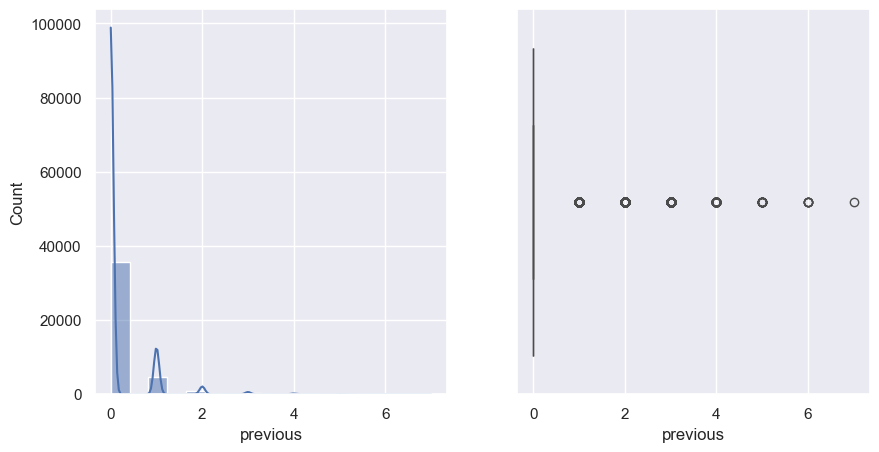

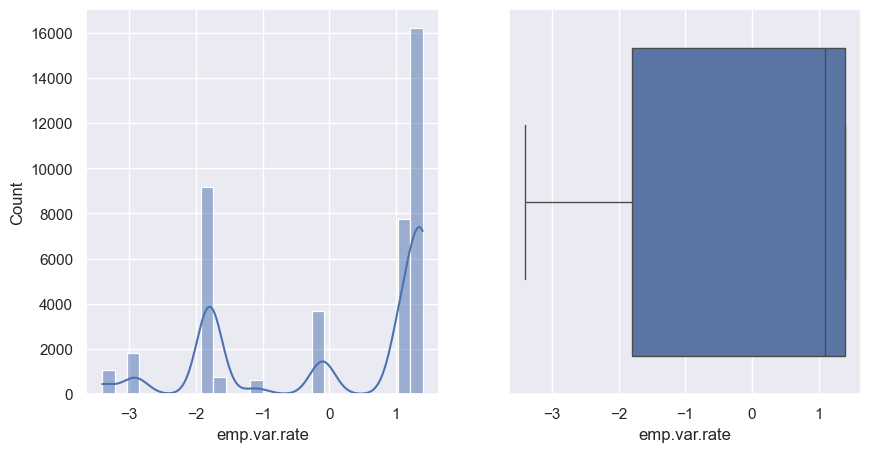

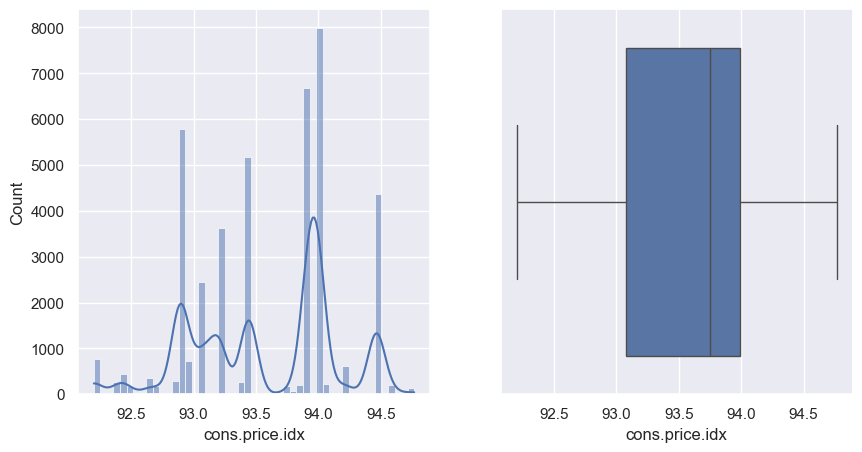

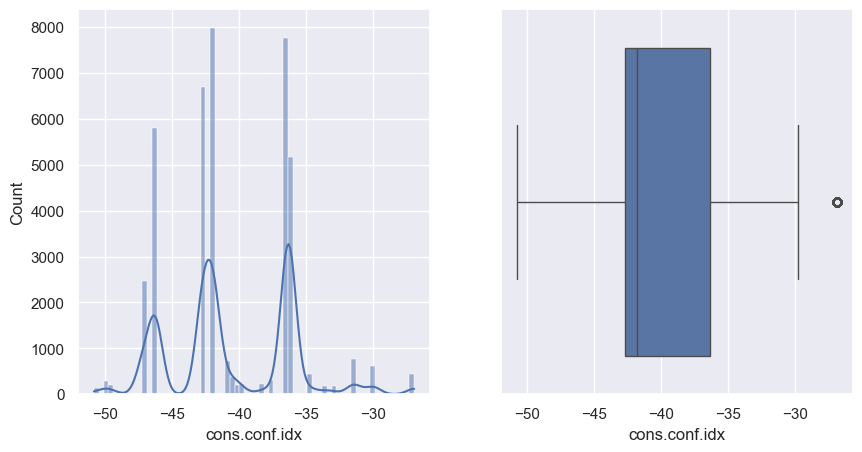

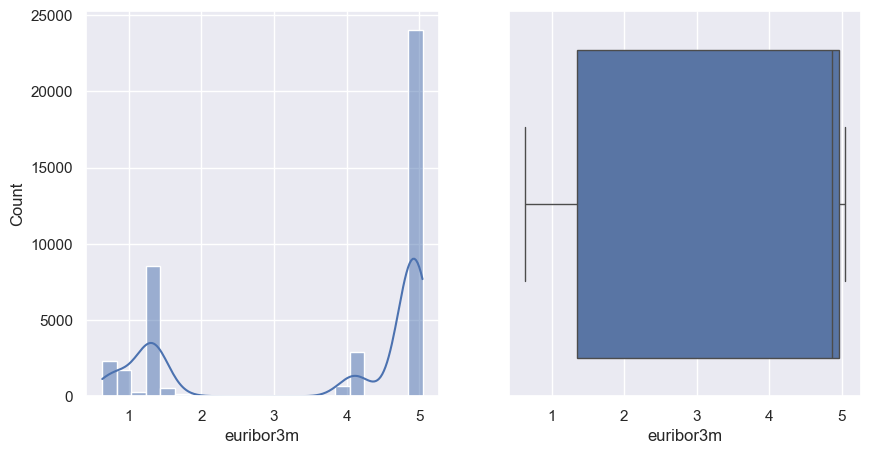

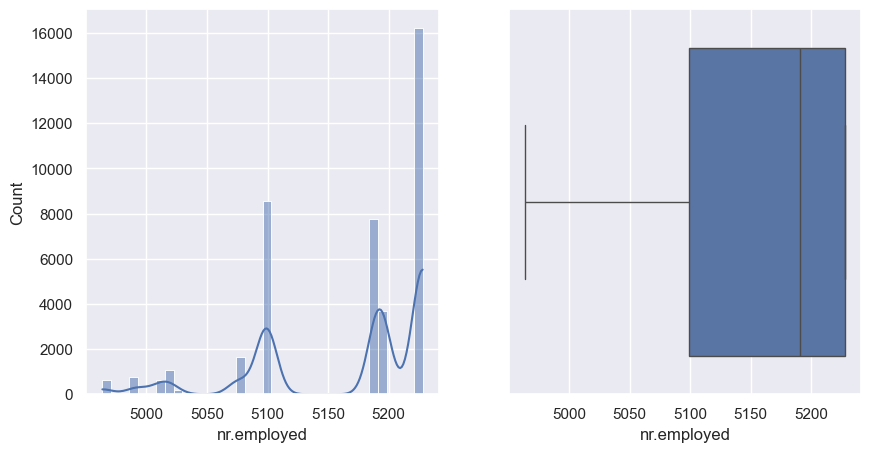

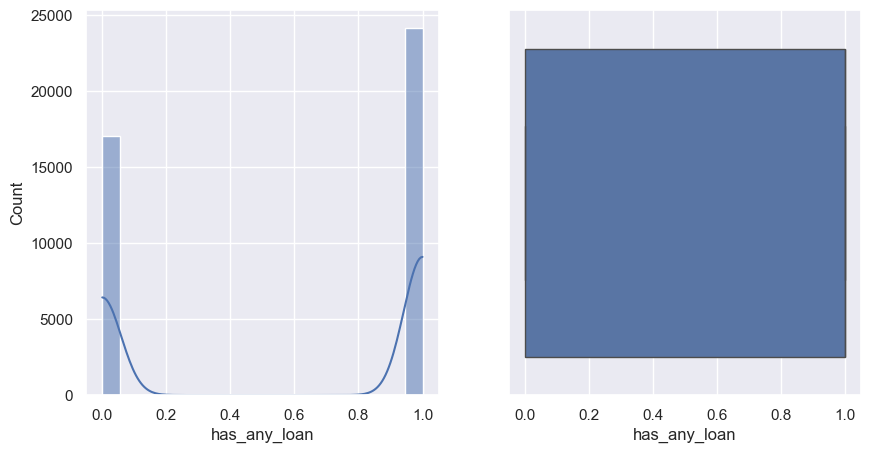

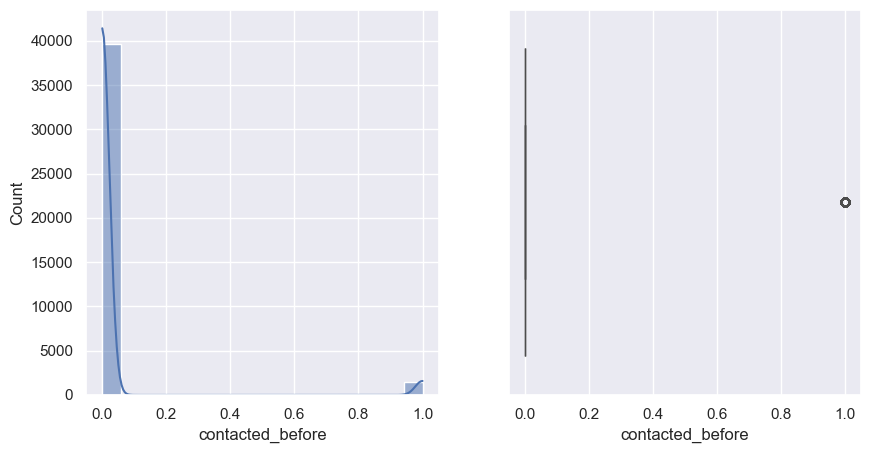

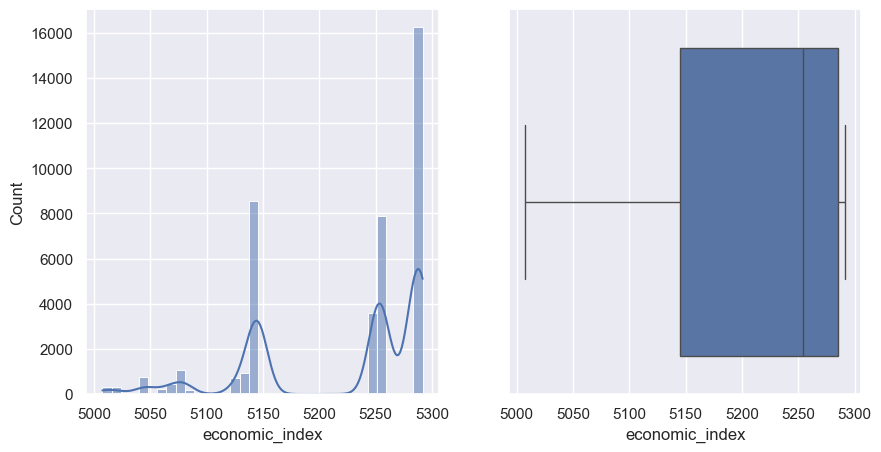

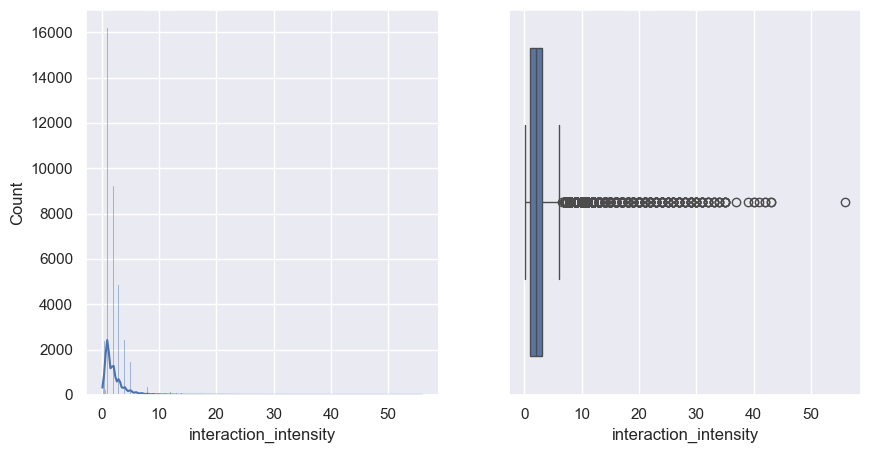

In [19]:
for col in df.select_dtypes('number').columns:
    fig,ax = plt.subplots(1,2)
    sns.histplot(df[col],kde=True,ax=ax[0])
    sns.boxplot(x=df[col],ax=ax[1])
    plt.show()

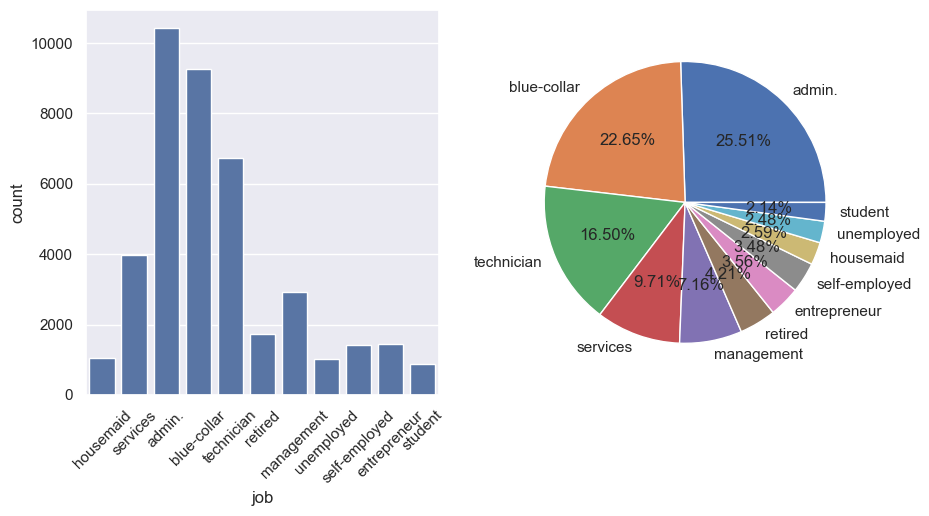

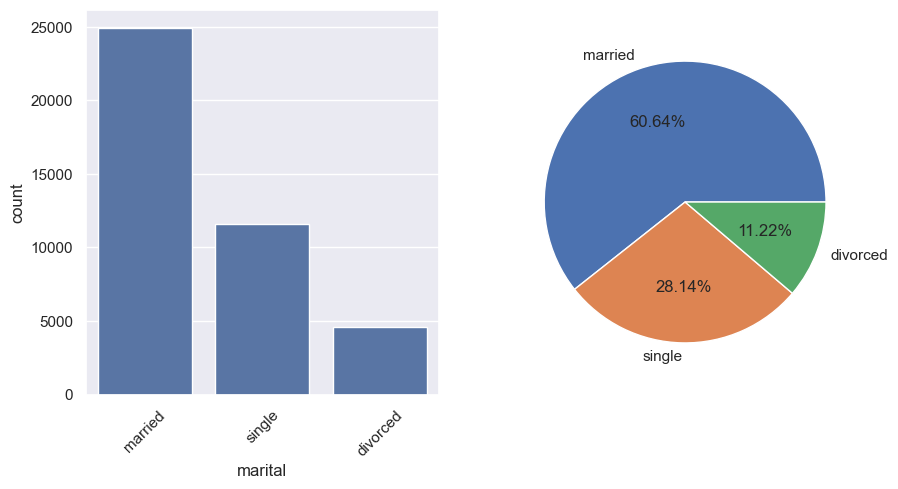

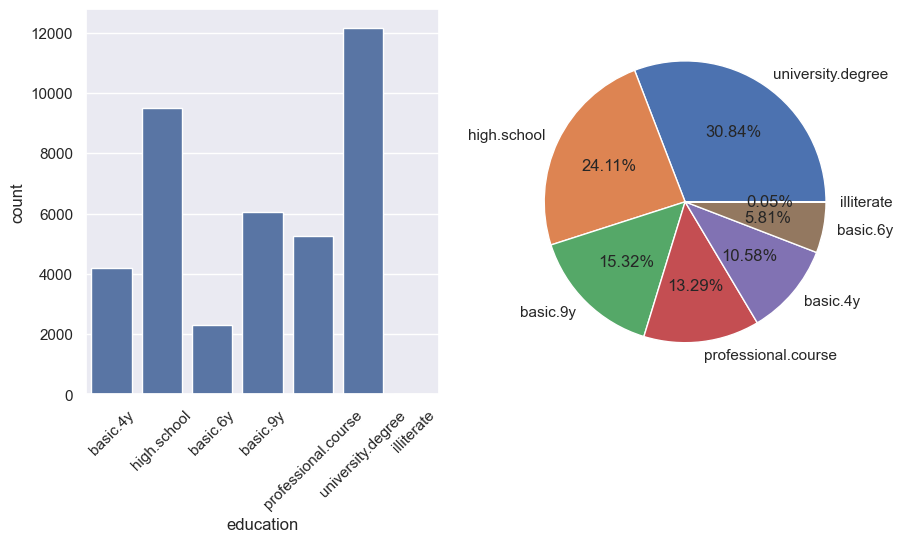

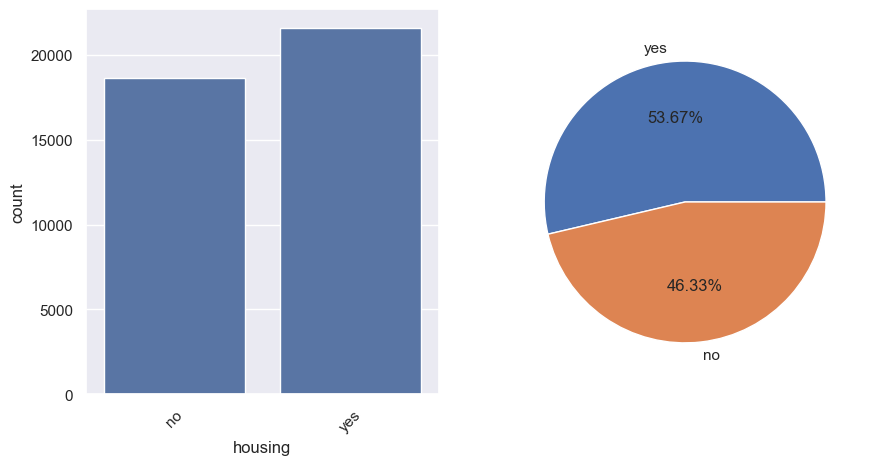

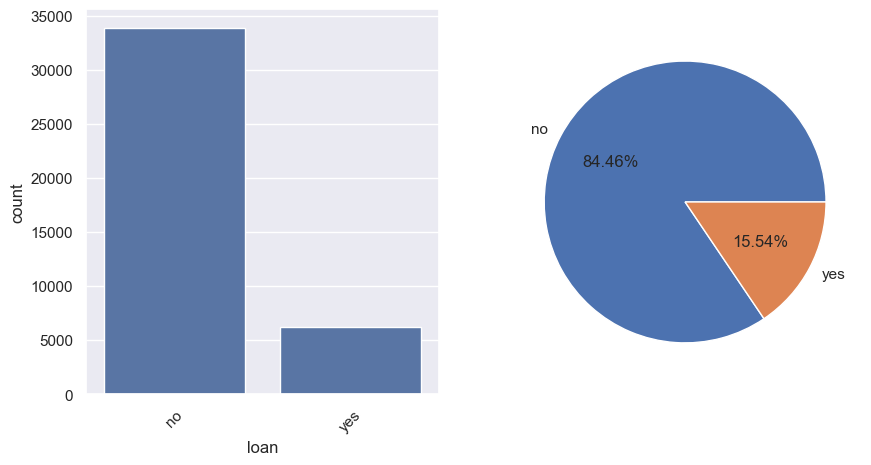

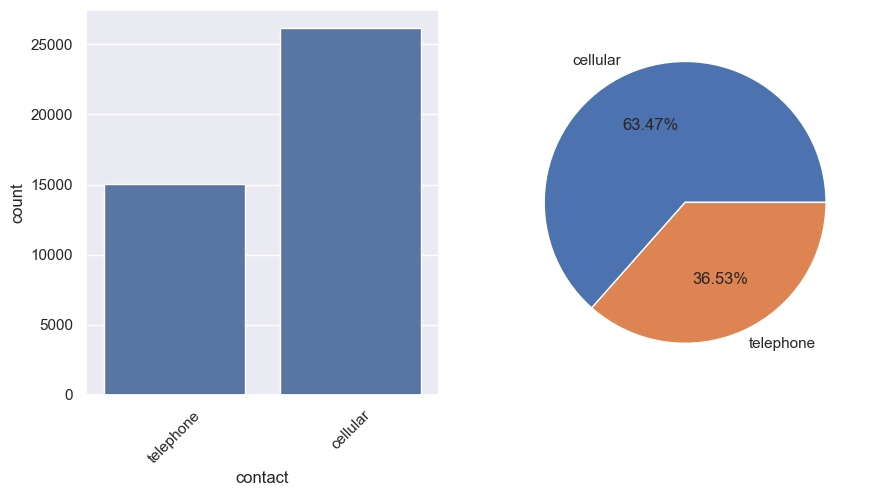

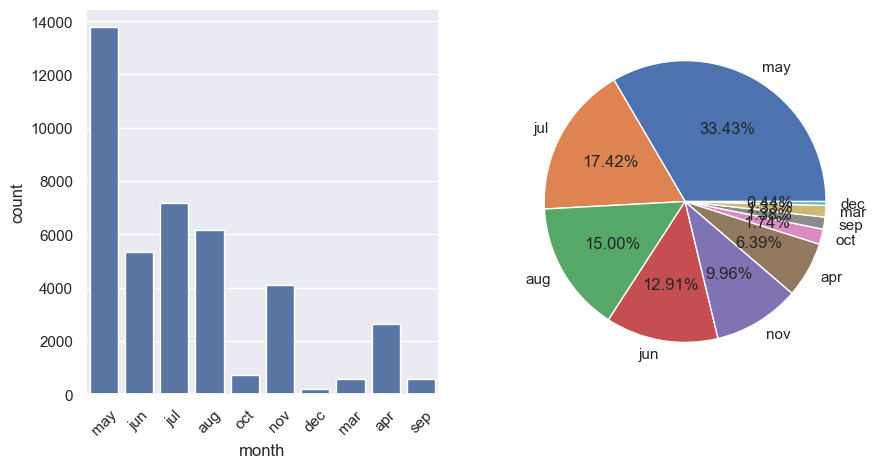

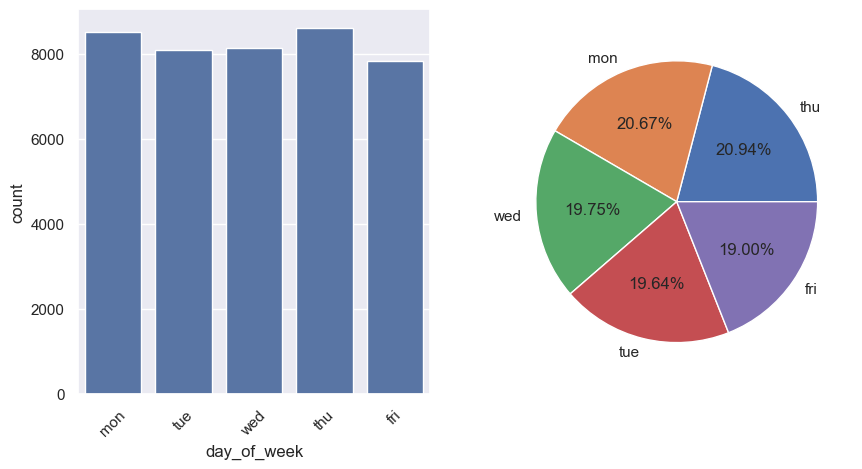

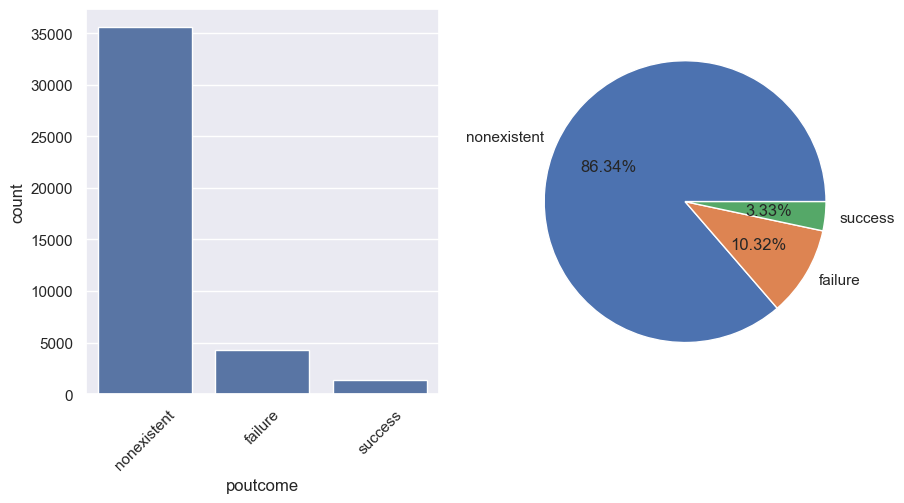

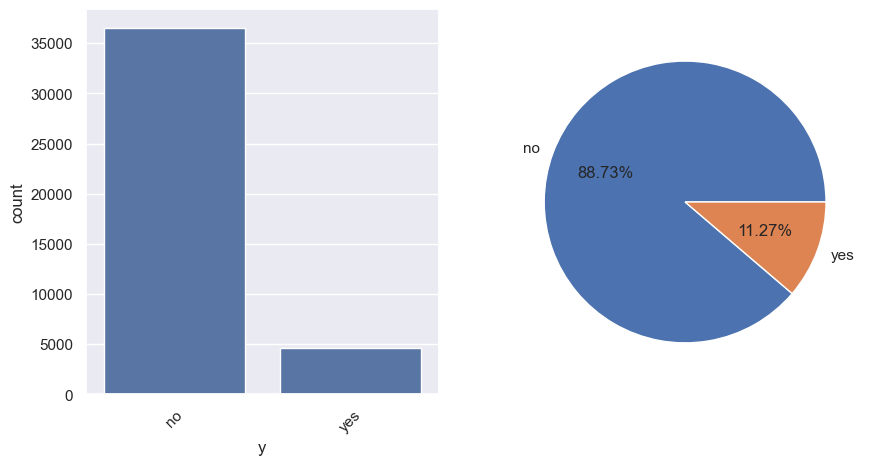

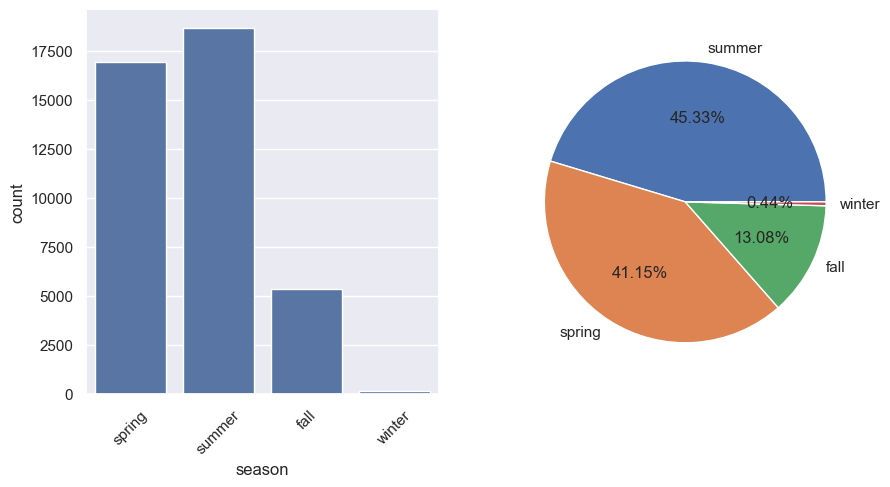

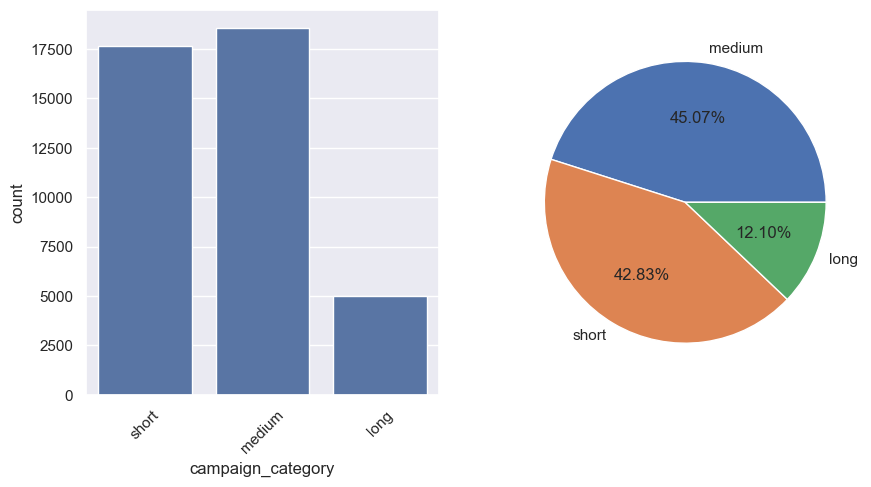

In [20]:
for col in df.select_dtypes('O'):
    fig,axes = plt.subplots(1,2)
    sns.countplot(x=df[col],ax=axes[0]).tick_params(axis='x',rotation=45)
    plt.pie(x=df[col].value_counts().values,labels=df[col].value_counts().index,autopct='%.2f%%')
    plt.show()

# Preprocessing

In [21]:
df.isna().mean() * 100

age                      0.000000
job                      0.801204
marital                  0.194231
education                4.202680
housing                  2.403613
loan                     2.403613
contact                  0.000000
month                    0.000000
day_of_week              0.000000
campaign                 0.000000
pdays                    0.000000
previous                 0.000000
poutcome                 0.000000
emp.var.rate             0.000000
cons.price.idx           0.000000
cons.conf.idx            0.000000
euribor3m                0.000000
nr.employed              0.000000
y                        0.000000
season                   0.000000
has_any_loan             0.000000
contacted_before         0.000000
age_group                0.000000
economic_index           0.000000
campaign_category        0.000000
interaction_intensity    0.000000
dtype: float64

In [22]:
df.duplicated().sum()

1997

In [23]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [24]:
X = df.drop(columns=['y'])
y = df['y'].map({'yes':1,'no':0})
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=41,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((31352, 25), (7839, 25), (31352,), (7839,))

In [25]:
X_train

age           job   marital          education housing loan    contact  \
304     33        admin.  divorced        high.school      no   no  telephone   
27809   35    technician   married  university.degree     yes   no   cellular   
22539   43    technician   married        high.school     yes   no  telephone   
7893    34   blue-collar   married           basic.4y      no   no  telephone   
32228   41     housemaid   married        high.school      no   no   cellular   
...    ...           ...       ...                ...     ...  ...        ...   
24882   31  entrepreneur    single  university.degree     yes   no   cellular   
37092   50        admin.   married  university.degree     yes   no   cellular   
3484    40        admin.   married  university.degree      no   no  telephone   
32189   30    technician   married           basic.9y      no   no   cellular   
7787    42   blue-collar   married           basic.9y      no   no  telephone   

      month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
304     may         mon         2     -1         0  nonexistent           1.1   
27809   apr         mon         3     -1         1      failure          -1.8   
22539   aug         fri         3     -1         0  nonexistent           1.4   
7893    jun         tue        13     -1         0  nonexistent           1.4   
32228   may         wed         2     -1         0  nonexistent          -1.8   
...     ...         ...       ...    ...       ...          ...           ...   
24882   nov         thu         1     -1         0  nonexistent          -0.1   
37092   dec         tue         3     -1         0  nonexistent          -3.0   
3484    may         fri         1     -1         0  nonexistent           1.1   
32189   may         wed         4     -1         1      failure          -1.8   
7787    jun         mon         3     -1         0  nonexistent           1.4   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  season  \
304            93.994          -36.4      4.857       5191.0  spring   
27809          93.075          -47.1      1.405       5099.1  spring   
22539          93.444          -36.1      4.963       5228.1  summer   
7893           94.465          -41.8      4.864       5228.1  summer   
32228          92.893          -46.2      1.281       5099.1  spring   
...               ...            ...        ...          ...     ...   
24882          93.200          -42.0      4.076       5195.8    fall   
37092          92.713          -33.0      0.708       5023.5  winter   
3484           93.994          -36.4      4.859       5191.0  spring   
32189          92.893          -46.2      1.281       5099.1  spring   
7787           94.465          -41.8      4.865       5228.1  summer   

       has_any_loan  contacted_before    age_group  economic_index  \
304               0                 0        young        5254.551   
27809             1                 0        adult        5144.680   
22539             1                 0        adult        5291.807   
7893              0                 0        adult        5287.029   
32228             0                 0        adult        5145.274   
...             ...               ...          ...             ...   
24882             1                 0        young        5250.976   
37092             1                 0  middle_aged        5080.921   
3484              0                 0        adult        5254.553   
32189             0                 0        young        5145.274   
7787              0                 0        adult        5287.030   

      campaign_category  interaction_intensity  
304              medium                    2.0  
27809            medium                    1.5  
22539            medium                    3.0  
7893               long                   13.0  
32228            medium                    2.0  
...                 ...                    ...  
24882       

In [26]:
y_train

304      0
27809    0
22539    0
7893     0
32228    0
        ..
24882    0
37092    1
3484     0
32189    0
7787     0
Name: y, Length: 31352, dtype: int64

In [27]:
df.head()

age        job  marital    education housing loan    contact month  \
0   56  housemaid  married     basic.4y      no   no  telephone   may   
1   57   services  married  high.school      no   no  telephone   may   
2   37   services  married  high.school     yes   no  telephone   may   
3   40     admin.  married     basic.6y      no   no  telephone   may   
4   56   services  married  high.school      no  yes  telephone   may   

  day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0         mon         1     -1         0  nonexistent           1.1   
1         mon         1     -1         0  nonexistent           1.1   
2         mon         1     -1         0  nonexistent           1.1   
3         mon         1     -1         0  nonexistent           1.1   
4         mon         1     -1         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  season  \
0          93.994          -36.4      4.857       5191.0  no  spring   
1          93.994          -36.4      4.857       5191.0  no  spring   
2          93.994          -36.4      4.857       5191.0  no  spring   
3          93.994          -36.4      4.857       5191.0  no  spring   
4          93.994          -36.4      4.857       5191.0  no  spring   

   has_any_loan  contacted_before    age_group  economic_index  \
0             0                 0  middle_aged        5254.551   
1             0                 0  middle_aged        5254.551   
2             1                 0        adult        5254.551   
3             0                 0        adult        5254.551   
4             1                 0  middle_aged        5254.551   

  campaign_category  interaction_intensity  
0             short                    1.0  
1             short                    1.0  
2             short                    1.0  
3             short                    1.0  
4             short                    1.0

In [28]:
# age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed ---> nan , scale
# job,month,day_of_week  ---> nan , binary_encode
# martial,contact,poutcome,season,age_group,education,housing,loan ---> nan , oh_encode

In [29]:
age_day_campaign_pdays_previous_pipe = Pipeline(steps=[
    ('handel_nan',SimpleImputer(strategy='most_frequent')),
    ('scale',RobustScaler())
])

job_month_pipe = Pipeline(steps=[
    ('handel_nan',SimpleImputer(strategy='most_frequent')),
    ('binary_encode',BinaryEncoder())
])

martial_contact_poutcome_pipe = Pipeline(steps=[
    ('handel_nan',SimpleImputer(strategy='most_frequent')),
    ('oh_encode',OneHotEncoder(sparse_output=False,drop='first'))
])

preprocessor = ColumnTransformer(transformers=[
    ('age_day_campaign_pdays_previous',age_day_campaign_pdays_previous_pipe,['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','interaction_intensity','economic_index']),
    ('job_month',job_month_pipe,['job','month','day_of_week']),
    ('martial_contact_poutcome_pipe',martial_contact_poutcome_pipe,['marital','housing','loan','contact','poutcome','season','age_group','education','campaign_category'])
    ],remainder='passthrough',force_int_remainder_cols=False)

In [30]:
X_train_pre = preprocessor.fit_transform(X_train)
X_test_pre = preprocessor.transform(X_test)

In [31]:
y_train.value_counts(normalize=True)

0    0.882687
1    0.117313
Name: y, dtype: float64

In [32]:
X_train_pre.shape

(31352, 46)

# Dimensionality Reduction

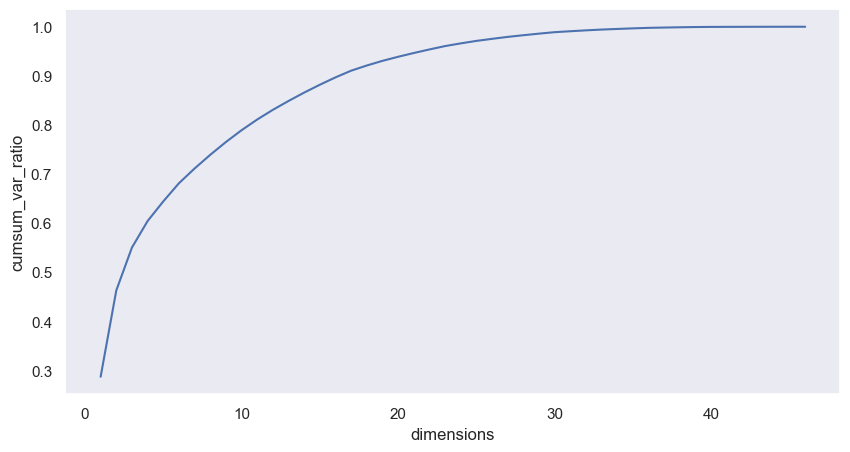

In [33]:
pca = PCA(random_state=42)
pca.fit_transform(X_train_pre)

dimensions = np.arange(1, 47)
cumsum_var_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(dimensions, cumsum_var_ratio)
plt.xlabel("dimensions")
plt.ylabel("cumsum_var_ratio")
plt.grid()
plt.show()

In [34]:
from kneed import KneeLocator
knee_point = KneeLocator(dimensions, cumsum_var_ratio, curve='concave', direction='increasing')
knee_point.knee

15

In [35]:
pca = PCA(n_components=15,random_state=42)
pca.fit_transform(X_train_pre)
sum(pca.explained_variance_ratio_)

0.8818598127334175

In [36]:
pca_95 = PCA(n_components=0.95,random_state=42)
X_train_reduced = pca_95.fit_transform(X_train_pre)
X_test_reduced = pca_95.transform(X_test_pre)
len(pca_95.explained_variance_ratio_)

22

# Clustering

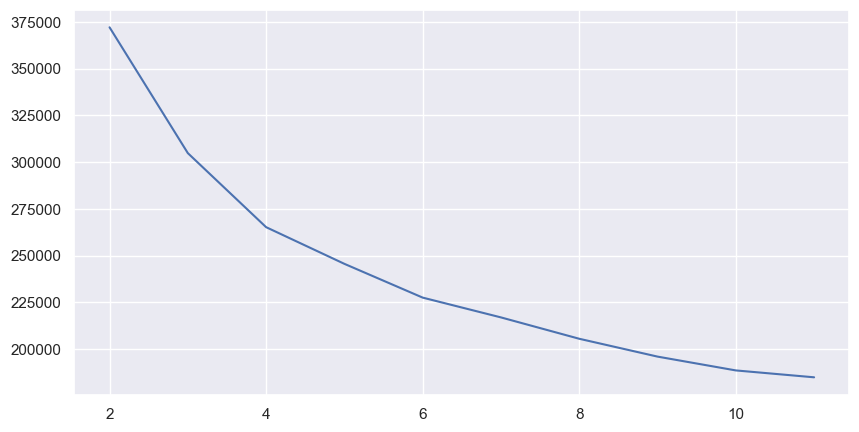

In [37]:
# Inertia Curve
inertias = []
k_range = range(2, 12)
for i in k_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10)
    kmeans.fit(X_train_reduced)
    inertias.append(kmeans.inertia_)
plt.plot(k_range, inertias)

In [38]:
knee_point = KneeLocator(k_range, inertias, curve='convex', direction='decreasing')
knee_point.knee

4

k = 2
k = 3
k = 4
k = 5
k = 6
k = 7
k = 8
k = 9
k = 10
k = 11
k = 12


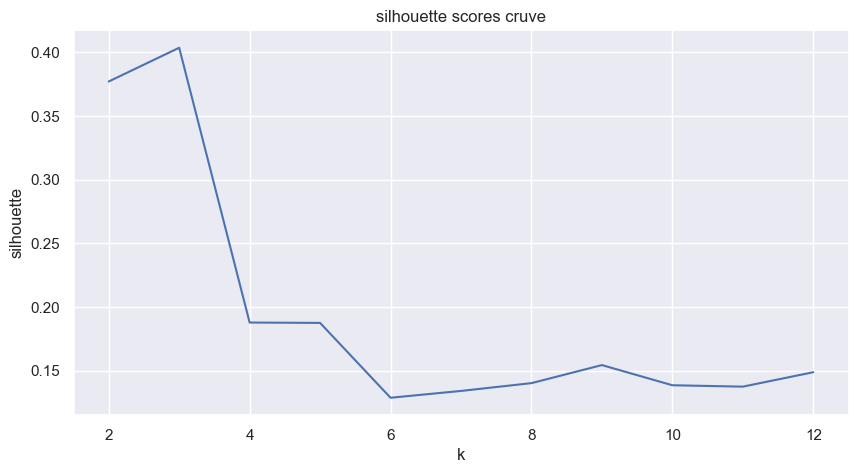

In [39]:
# Silhoutte
silhouette_values = []
clustering_models = []
k_range = range(2, 13)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, init='k-means++', max_iter=300)
    kmeans.fit(X_train_reduced)
    silhouette_values.append(silhouette_score(X_train_reduced, kmeans.labels_))
    clustering_models.append(kmeans)
    print(f'k = {k}')

plt.plot(k_range, silhouette_values)
plt.title("silhouette scores cruve")
plt.xlabel("k")
plt.ylabel('silhouette')
plt.show()

# Visualization

In [40]:
tsne = TSNE(n_components=2, learning_rate="auto", random_state=42)
X_2d = tsne.fit_transform(X_train_reduced)

In [41]:
fig = px.scatter(
    x=X_2d[:, 0],
    y=X_2d[:, 1],
    color=clustering_models[1].labels_,
    title='2D Representation of Digits (TSNE)',
    labels={'x': 'Dimension 1', 'y': 'Dimension 2'}
)

# Customize and display the plot
fig.update_traces(marker=dict(size=5))
fig.show()

In [42]:
clustering_pipe_line = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('pca',pca_95),
    ('kmean',clustering_models[1])
])

clustering_pipe_line.fit(X_train)

X_train_clusters = clustering_pipe_line.predict(X_train)
X_test_clusters = clustering_pipe_line.predict(X_test)

X_train_new = np.c_[X_train,X_train_clusters]
X_test_new = np.c_[X_test,X_test_clusters]

X_train_new_df = pd.DataFrame(X_train_new,index=X_train.index,columns=list(X_train.columns) + ['clusters'])
X_test_new_df = pd.DataFrame(X_test_new,index=X_test.index,columns=list(X_test.columns) + ['clusters'])

In [43]:
X_train_new_df

age           job   marital          education housing loan    contact  \
304    33        admin.  divorced        high.school      no   no  telephone   
27809  35    technician   married  university.degree     yes   no   cellular   
22539  43    technician   married        high.school     yes   no  telephone   
7893   34   blue-collar   married           basic.4y      no   no  telephone   
32228  41     housemaid   married        high.school      no   no   cellular   
...    ..           ...       ...                ...     ...  ...        ...   
24882  31  entrepreneur    single  university.degree     yes   no   cellular   
37092  50        admin.   married  university.degree     yes   no   cellular   
3484   40        admin.   married  university.degree      no   no  telephone   
32189  30    technician   married           basic.9y      no   no   cellular   
7787   42   blue-collar   married           basic.9y      no   no  telephone   

      month day_of_week campaign pdays previous     poutcome emp.var.rate  \
304     may         mon        2    -1        0  nonexistent          1.1   
27809   apr         mon        3    -1        1      failure         -1.8   
22539   aug         fri        3    -1        0  nonexistent          1.4   
7893    jun         tue       13    -1        0  nonexistent          1.4   
32228   may         wed        2    -1        0  nonexistent         -1.8   
...     ...         ...      ...   ...      ...          ...          ...   
24882   nov         thu        1    -1        0  nonexistent         -0.1   
37092   dec         tue        3    -1        0  nonexistent         -3.0   
3484    may         fri        1    -1        0  nonexistent          1.1   
32189   may         wed        4    -1        1      failure         -1.8   
7787    jun         mon        3    -1        0  nonexistent          1.4   

      cons.price.idx cons.conf.idx euribor3m nr.employed  season has_any_loan  \
304           93.994         -36.4     4.857      5191.0  spring            0   
27809         93.075         -47.1     1.405      5099.1  spring            1   
22539         93.444         -36.1     4.963      5228.1  summer            1   
7893          94.465         -41.8     4.864      5228.1  summer            0   
32228         92.893         -46.2     1.281      5099.1  spring            0   
...              ...           ...       ...         ...     ...          ...   
24882           93.2         -42.0     4.076      5195.8    fall            1   
37092         92.713         -33.0     0.708      5023.5  winter            1   
3484          93.994         -36.4     4.859      5191.0  spring            0   
32189         92.893         -46.2     1.281      5099.1  spring            0   
7787          94.465         -41.8     4.865      5228.1  summer            0   

      contacted_before    age_group economic_index campaign_category  \
304                  0        young       5254.551            medium   
27809                0        adult        5144.68            medium   
22539                0        adult       5291.807            medium   
7893                 0        adult       5287.029              long   
32228                0        adult       5145.274            medium   
...                ...          ...            ...               ...   
24882                0        young       5250.976             short   
37092                0  middle_aged       5080.921            medium   
3484                 0        adult       5254.553             short   
32189                0        young       5145.274            medium   
7787                 0        adult        5287.03            medium   

      interaction_intensity clusters  
304                     2.0        0  
27809                   1.5        0  
22539                   3.0        0  
7893                   13.0        1  
32228                   2.0        0  
...                     ...      ...  
24882    

In [44]:
modeling_pipe_line = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('pca',pca_95)
])

X_train_modeling = modeling_pipe_line.fit_transform(X_train_new_df)
X_test_modeling = modeling_pipe_line.transform(X_test_new_df)

# Modeling

In [45]:
log_cls = LogisticRegression(C=1,max_iter=1000,random_state=42,class_weight='balanced')
log_cls.fit(X_train_modeling,y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000, random_state=42)

In [46]:
y_valid_pred = cross_val_predict(log_cls,X_train_modeling, y_train,cv=3,method='predict')

print(f'Train Accuracy : {log_cls.score(X_train_modeling, y_train)}')
print(f'Valid Accuracy : {accuracy_score(y_train,y_valid_pred)}')
print(f'Valid Precision : {precision_score(y_train,y_valid_pred)}')
print(f'Valid Recall : {recall_score(y_train,y_valid_pred)}')
print(f'Valid F1 : {f1_score(y_train,y_valid_pred)}')
confusion_matrix(y_train,y_valid_pred)

Train Accuracy : 0.8042549119673386
Valid Accuracy : 0.8030109721867823
Valid Precision : 0.32657595112468757
Valid Recall : 0.6394779771615008
Valid F1 : 0.4323529411764706


array([[22824,  4850],
       [ 1326,  2352]], dtype=int64)

In [47]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_modeling, y_train)

KNeighborsClassifier()

In [48]:
y_valid_pred = cross_val_predict(knn,X_train_modeling, y_train,cv=3,method='predict')

print(f'Train Accuracy : {knn.score(X_train_modeling, y_train)}')
print(f'Valid Accuracy : {accuracy_score(y_train,y_valid_pred)}')
print(f'Valid Precision : {precision_score(y_train,y_valid_pred)}')
print(f'Valid Recall : {recall_score(y_train,y_valid_pred)}')
print(f'Valid F1 : {f1_score(y_train,y_valid_pred)}')
confusion_matrix(y_train,y_valid_pred)

Train Accuracy : 0.9092880836948201
Valid Accuracy : 0.885398060729778
Valid Precision : 0.5230352303523035
Valid Recall : 0.2623708537248505
Valid F1 : 0.3494477638964331


array([[26794,   880],
       [ 2713,   965]], dtype=int64)

In [49]:
grid_params = {
    'n_neighbors': [3,5,7,9],
    'leaf_size': [10,15,20,30],
}

knn_grid = GridSearchCV(knn,grid_params,cv=3,scoring='f1',n_jobs=-1)
knn_grid.fit(X_train_modeling, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [10, 15, 20, 30],
                         'n_neighbors': [3, 5, 7, 9]},
             scoring='f1')

In [50]:
knn_grid.best_params_

{'leaf_size': 10, 'n_neighbors': 5}

In [51]:
knn_grid.best_score_

0.3492824196745765

In [52]:
nb = GaussianNB()
nb.fit(X_train_modeling, y_train)

GaussianNB()

In [53]:
y_valid_pred = cross_val_predict(nb,X_train_modeling, y_train,cv=3,method='predict')

print(f'Train Accuracy : {nb.score(X_train_modeling, y_train)}')
print(f'Valid Accuracy : {accuracy_score(y_train,y_valid_pred)}')
print(f'Valid Precision : {precision_score(y_train,y_valid_pred)}')
print(f'Valid Recall : {recall_score(y_train,y_valid_pred)}')
print(f'Valid F1 : {f1_score(y_train,y_valid_pred)}')
confusion_matrix(y_train,y_valid_pred)

Train Accuracy : 0.8757655014034192
Valid Accuracy : 0.8757336055116101
Valid Precision : 0.46526449968132566
Valid Recall : 0.3969548667754214
Valid F1 : 0.4284037558685446


array([[25996,  1678],
       [ 2218,  1460]], dtype=int64)

In [54]:
linear_svc = LinearSVC(C=1,random_state=42,class_weight='balanced')
linear_svc.fit(X_train_modeling, y_train)

LinearSVC(C=1, class_weight='balanced', random_state=42)

In [55]:
y_valid_pred = cross_val_predict(linear_svc,X_train_modeling, y_train,cv=3,method='predict')

print(f'Train Accuracy : {linear_svc.score(X_train_modeling, y_train)}')
print(f'Valid Accuracy : {accuracy_score(y_train,y_valid_pred)}')
print(f'Valid Precision : {precision_score(y_train,y_valid_pred)}')
print(f'Valid Recall : {recall_score(y_train,y_valid_pred)}')
print(f'Valid F1 : {f1_score(y_train,y_valid_pred)}')
confusion_matrix(y_train,y_valid_pred)

Train Accuracy : 0.796791273284001
Valid Accuracy : 0.7955154376116356
Valid Precision : 0.3172395345726896
Valid Recall : 0.644915715062534
Valid F1 : 0.4252801434334379


array([[22569,  5105],
       [ 1306,  2372]], dtype=int64)

In [56]:
svm = SVC(C=1,kernel='poly',degree=2,coef0=1,random_state=42,class_weight='balanced')
svm.fit(X_train_modeling, y_train)

SVC(C=1, class_weight='balanced', coef0=1, degree=2, kernel='poly',
    random_state=42)

In [58]:
y_valid_pred = cross_val_predict(svm,X_train_modeling, y_train,cv=3,method='predict')

print(f'Train Accuracy : {svm.score(X_train_modeling, y_train)}')
print(f'Valid Accuracy : {accuracy_score(y_train,y_valid_pred)}')
print(f'Valid Precision : {precision_score(y_train,y_valid_pred)}')
print(f'Valid Recall : {recall_score(y_train,y_valid_pred)}')
print(f'Valid F1 : {f1_score(y_train,y_valid_pred)}')
confusion_matrix(y_train,y_valid_pred)

Train Accuracy : 0.8288785404439908
Valid Accuracy : 0.8292931870375095
Valid Precision : 0.3624712454814328
Valid Recall : 0.5997824904839587
Valid F1 : 0.45186399016796397


array([[23794,  3880],
       [ 1472,  2206]], dtype=int64)

In [ ]:
# param_dist = {
#     'degree':[2,3,5,10,20],
#     'coef0':[0,1,2,3],
# }

# svc_random_grid = RandomizedSearchCV(svm,param_dist,cv=3,scoring='f1',n_jobs=-1,n_iter=10)
# svc_random_grid.fit(X_train_modeling, y_train)

In [ ]:
# svc_random_grid.best_params_

In [ ]:
# svc_random_grid.best_score_

In [ ]:
dt = DecisionTreeClassifier(max_depth=5,random_state=42,class_weight='balanced')
dt.fit(X_train_modeling, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [ ]:
y_valid_pred = cross_val_predict(dt,X_train_modeling, y_train,cv=3,method='predict')

print(f'Train Accuracy : {dt.score(X_train_modeling, y_train)}')
print(f'Valid Accuracy : {accuracy_score(y_train,y_valid_pred)}')
print(f'Valid Precision : {precision_score(y_train,y_valid_pred)}')
print(f'Valid Recall : {recall_score(y_train,y_valid_pred)}')
print(f'Valid F1 : {f1_score(y_train,y_valid_pred)}')
confusion_matrix(y_train,y_valid_pred)

Train Accuracy : 0.8507272263332483
Valid Accuracy : 0.8270604746108701
Valid Precision : 0.3551976087678512
Valid Recall : 0.5815660685154975
Valid F1 : 0.44103092783505154


array([[23791,  3883],
       [ 1539,  2139]], dtype=int64)

In [ ]:
param_grid = {
    'max_depth':[3,5,7,9,11,None],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[1,2,3,4],
}

dt_grid = GridSearchCV(dt,param_grid,cv=3,scoring='f1',n_jobs=-1)
dt_grid.fit(X_train_modeling, y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              max_depth=5, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11, None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='f1')

In [ ]:
dt_grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [ ]:
dt_grid.best_score_

0.44158692823109497

# Oversample

In [ ]:
# Logestic Regression
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

log_oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", LogisticRegression(C=1.0, max_iter=20000, random_state=42))
    ])
log_oversampling_pipeline.fit(X_train_new_df, y_train)
y_train_pred = log_oversampling_pipeline.predict(X_train_new_df)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=3)
i = 1
for train_indx, valid_indx in skfolds.split(X_train_new_df, y_train):
    print(f"At fold {i}")

    log_oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", LogisticRegression(C=1.0, max_iter=20000, random_state=42))
    ])

    log_oversampling_pipeline.fit(X_train_new_df.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = log_oversampling_pipeline.predict(X_train_new_df.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

Train Accuracy: 0.7989601939270222
At fold 1
At fold 2
At fold 3
Average Valid Accuracy: 0.7979395331170281
Average Valid Precsion: 0.31969836852197797
Average Valid Recall: 0.6405655247417075
Average Valid F1 Score: 0.42651916876636314


In [65]:
# KNN
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

knn_oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=5,n_jobs=-1))
    ])
knn_oversampling_pipeline.fit(X_train_new_df, y_train)
y_train_pred = knn_oversampling_pipeline.predict(X_train_new_df)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=3)
i = 1
for train_indx, valid_indx in skfolds.split(X_train_new_df, y_train): # 5 Model
    print(f"At fold {i}")

    knn_oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=5,n_jobs=-1))
    ])

    knn_oversampling_pipeline.fit(X_train_new_df.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = knn_oversampling_pipeline.predict(X_train_new_df.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

Train Accuracy: 0.8415093136004083
At fold 1
At fold 2
At fold 3
Average Valid Accuracy: 0.733318377841944
Average Valid Precsion: 0.23954017769183236
Average Valid Recall: 0.5851005981511691
Average Valid F1 Score: 0.3399021448428521


In [66]:
# Naive Bayes
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

nb_oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", GaussianNB())
    ])
nb_oversampling_pipeline.fit(X_train_new_df, y_train)
y_train_pred = nb_oversampling_pipeline.predict(X_train_new_df)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=3)
i = 1
for train_indx, valid_indx in skfolds.split(X_train_new_df, y_train): # 5 Model
    print(f"At fold {i}")

    nb_oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", GaussianNB())
    ])

    nb_oversampling_pipeline.fit(X_train_new_df.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = nb_oversampling_pipeline.predict(X_train_new_df.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

Train Accuracy: 0.8459109466700689
At fold 1
At fold 2
At fold 3
Average Valid Accuracy: 0.8355768462744878
Average Valid Precsion: 0.3660672512403975
Average Valid Recall: 0.5361609570418705
Average Valid F1 Score: 0.43389662065133666


In [67]:
# Linear SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

nb_oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", LinearSVC(C=1,max_iter=1000,random_state=42,class_weight='balanced'))
    ])
nb_oversampling_pipeline.fit(X_train_new_df, y_train)
y_train_pred = nb_oversampling_pipeline.predict(X_train_new_df)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=3)
i = 1
for train_indx, valid_indx in skfolds.split(X_train_new_df, y_train): # 5 Model
    print(f"At fold {i}")

    nb_oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", LinearSVC(C=1,max_iter=1000,random_state=42,class_weight='balanced'))
    ])

    nb_oversampling_pipeline.fit(X_train_new_df.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = nb_oversampling_pipeline.predict(X_train_new_df.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

Train Accuracy: 0.7915603470273029
At fold 1
At fold 2
At fold 3
Average Valid Accuracy: 0.792262062328689
Average Valid Precsion: 0.3131870587690095
Average Valid Recall: 0.6462751495377922
Average Valid F1 Score: 0.42190274893369556


In [68]:
# Decision Tree
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

dt_oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=9,random_state=42))
    ])
dt_oversampling_pipeline.fit(X_train_new_df, y_train)
y_train_pred = dt_oversampling_pipeline.predict(X_train_new_df)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=3)
i = 1
for train_indx, valid_indx in skfolds.split(X_train_new_df, y_train): # 5 Model
    print(f"At fold {i}")

    dt_oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=9,random_state=42))
    ])

    dt_oversampling_pipeline.fit(X_train_new_df.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = dt_oversampling_pipeline.predict(X_train_new_df.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

Train Accuracy: 0.8310793569788212
At fold 1
At fold 2
At fold 3
Average Valid Accuracy: 0.8089115988534327
Average Valid Precsion: 0.317800096160855
Average Valid Recall: 0.5478520935290918
Average Valid F1 Score: 0.4021497852192462


## Grid Search

In [69]:
# KNN

params_grid = {'model__n_neighbors': [5,19,31,41,51],
               'model__leaf_size':[30, 40, 50, 80],
               }


oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=77, leaf_size=50)) # 135 Model
    ])

knn_grid = GridSearchCV(oversampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1') # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=3)
i = 1
for train_indx, valid_indx in skfolds.split(X_train_new_df, y_train): # 2025 Model
    print(f"At fold {i}")

    knn_grid.fit(X_train_new_df.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_knn_model = knn_grid.best_estimator_
    y_valid_pred = knn_grid.predict(X_train_new_df.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

At fold 1
At fold 2
At fold 3
Average Valid Accuracy: 0.7089182586253125
Average Valid Precsion: 0.2408289317315684
Average Valid Recall: 0.6881457313757476
Average Valid F1 Score: 0.3567658612381685


In [70]:
best_knn_model # only trained on 80%(80% train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('age_day_campaign_pdays_previous',
                                                  Pipeline(steps=[('handel_nan',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   '...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oh_encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['marital', 'housing', 'loan',
                                                   'contact', 'poutcome',
                                                   'season', 'age_group',
                                                   'education',
                                                   'campaign_category'])])),
                ('pca', PCA(n_components=0.95, random_state=42)),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model', KNeighborsClassifier(n_neighbors=51))])

In [71]:
knn_grid.best_params_

{'model__leaf_size': 30, 'model__n_neighbors': 51}

In [72]:
# DT

from sklearn.model_selection import KFold
params_grid = {'model__max_depth': [3, 5, 7],
                'model__max_leaf_nodes':[5, 10, 20],
                'model__min_samples_split':[15,20, 25],
                'model__min_samples_leaf':[5,10, 20],
                }



oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5, random_state=42, min_samples_split=20, min_samples_leaf=10)) # 135 Model
    ])

dt_clf_grid = GridSearchCV(oversampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1') # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=3)
i = 1
for train_indx, valid_indx in skfolds.split(X_train_new_df, y_train): # 2025 Model
    print(f"At fold {i}")

    dt_clf_grid.fit(X_train_new_df.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_dt_clf_model = dt_clf_grid.best_estimator_
    y_valid_pred = dt_clf_grid.predict(X_train_new_df.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

At fold 1
At fold 2
At fold 3
Average Valid Accuracy: 0.8041281429232217
Average Valid Precsion: 0.3269829881617558
Average Valid Recall: 0.600326264274062
Average Valid F1 Score: 0.42057598637381793


In [73]:
best_dt_clf_model # only trained on 80%(80% train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('age_day_campaign_pdays_previous',
                                                  Pipeline(steps=[('handel_nan',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   '...
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['marital', 'housing', 'loan',
                                                   'contact', 'poutcome',
                                                   'season', 'age_group',
                                                   'education',
                                                   'campaign_category'])])),
                ('pca', PCA(n_components=0.95, random_state=42)),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model',
                 DecisionTreeClassifier(max_depth=7, max_leaf_nodes=10,
                                        min_samples_leaf=5,
                                        min_samples_split=15,
                                        random_state=42))])

In [74]:
dt_clf_grid.best_params_

{'model__max_depth': 7,
 'model__max_leaf_nodes': 10,
 'model__min_samples_leaf': 5,
 'model__min_samples_split': 15}

# Undersample

In [77]:
# Logestic Regression
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

log_undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", LogisticRegression(C=1.0, max_iter=20000, random_state=42))
    ])
log_undersampling_pipeline.fit(X_train_new_df, y_train)
y_train_pred = log_undersampling_pipeline.predict(X_train_new_df)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=3)
i = 1
for train_indx, valid_indx in skfolds.split(X_train_new_df, y_train): # 5 Model
    print(f"At fold {i}")

    log_undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", LogisticRegression(C=1.0, max_iter=20000, random_state=42))
    ])

    log_undersampling_pipeline.fit(X_train_new_df.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = log_undersampling_pipeline.predict(X_train_new_df.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

Train Accuracy: 0.7959300842051544
At fold 1
At fold 2
At fold 3
Average Valid Accuracy: 0.7936974262972782
Average Valid Precsion: 0.31545106778522275
Average Valid Recall: 0.6484502446982056
Average Valid F1 Score: 0.4243931570134279


In [78]:
# KNN
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

knn_undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=5,n_jobs=-1))
    ])
knn_undersampling_pipeline.fit(X_train_new_df, y_train)
y_train_pred = knn_undersampling_pipeline.predict(X_train_new_df)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=3)
i = 1
for train_indx, valid_indx in skfolds.split(X_train_new_df, y_train): # 5 Model
    print(f"At fold {i}")

    knn_undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=5,n_jobs=-1))
    ])

    knn_undersampling_pipeline.fit(X_train_new_df.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = knn_undersampling_pipeline.predict(X_train_new_df.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

Train Accuracy: 0.7397295228374585
At fold 1
At fold 2
At fold 3
Average Valid Accuracy: 0.7137026454585591
Average Valid Precsion: 0.239601912235574
Average Valid Recall: 0.6625883632408918
Average Valid F1 Score: 0.35190480501026755


In [79]:
# Naive Bayes
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

nb_undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", GaussianNB())
    ])
nb_undersampling_pipeline.fit(X_train_new_df, y_train)
y_train_pred = nb_undersampling_pipeline.predict(X_train_new_df)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=3)
i = 1
for train_indx, valid_indx in skfolds.split(X_train_new_df, y_train): # 5 Model
    print(f"At fold {i}")

    nb_undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", GaussianNB())
    ])

    nb_undersampling_pipeline.fit(X_train_new_df.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = nb_undersampling_pipeline.predict(X_train_new_df.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

Train Accuracy: 0.8395317683082419
At fold 1
At fold 2
At fold 3
Average Valid Accuracy: 0.8324511729912372
Average Valid Precsion: 0.3610743051254212
Average Valid Recall: 0.5418705818379554
Average Valid F1 Score: 0.43176497926157853


In [80]:
# Linear SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

linear_svc_undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", LinearSVC(C=1,max_iter=1000,random_state=42,class_weight='balanced'))
    ])
linear_svc_undersampling_pipeline.fit(X_train_new_df, y_train)
y_train_pred = linear_svc_undersampling_pipeline.predict(X_train_new_df)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=3)
i = 1
for train_indx, valid_indx in skfolds.split(X_train_new_df, y_train): # 5 Model
    print(f"At fold {i}")

    linear_svc_undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", LinearSVC(C=1,max_iter=1000,random_state=42,class_weight='balanced'))
    ])

    linear_svc_undersampling_pipeline.fit(X_train_new_df.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = linear_svc_undersampling_pipeline.predict(X_train_new_df.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

Train Accuracy: 0.7853725440163307
At fold 1
At fold 2
At fold 3
Average Valid Accuracy: 0.785276977989637
Average Valid Precsion: 0.3063246650926668
Average Valid Recall: 0.6566068515497553
Average Valid F1 Score: 0.41769792941190126


In [81]:
# Decision Tree
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

dt_undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=9,random_state=42))
    ])
dt_undersampling_pipeline.fit(X_train_new_df, y_train)
y_train_pred = dt_undersampling_pipeline.predict(X_train_new_df)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=3)
i = 1
for train_indx, valid_indx in skfolds.split(X_train_new_df, y_train): # 5 Model
    print(f"At fold {i}")

    dt_undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=9,random_state=42))
    ])

    dt_undersampling_pipeline.fit(X_train_new_df.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = dt_undersampling_pipeline.predict(X_train_new_df.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

Train Accuracy: 0.7711150803776473
At fold 1
At fold 2
At fold 3
Average Valid Accuracy: 0.776249272636624
Average Valid Precsion: 0.28767702788094934
Average Valid Recall: 0.601957585644372
Average Valid F1 Score: 0.38815993324375103


## Grid Search

In [82]:
# KNN

params_grid = {'model__n_neighbors': [5,19,31,31,51],
                'model__leaf_size':[15,20,30, 40],
                }


undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=77, leaf_size=50)) # 135 Model
    ])

knn_grid = GridSearchCV(undersampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1') # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=3)
i = 1
for train_indx, valid_indx in skfolds.split(X_train_new_df, y_train): # 2025 Model
    print(f"At fold {i}")

    knn_grid.fit(X_train_new_df.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_knn_model = knn_grid.best_estimator_
    y_valid_pred = knn_grid.predict(X_train_new_df.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

At fold 1
At fold 2
At fold 3
Average Valid Accuracy: 0.8084652262697175
Average Valid Precsion: 0.3316957011349957
Average Valid Recall: 0.623436650353453
Average Valid F1 Score: 0.43297918462326396


In [83]:
best_knn_model # only trained on 80%(80% train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('age_day_campaign_pdays_previous',
                                                  Pipeline(steps=[('handel_nan',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   '...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oh_encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['marital', 'housing', 'loan',
                                                   'contact', 'poutcome',
                                                   'season', 'age_group',
                                                   'education',
                                                   'campaign_category'])])),
                ('pca', PCA(n_components=0.95, random_state=42)),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model', KNeighborsClassifier(leaf_size=15, n_neighbors=51))])

In [84]:
knn_grid.best_params_

{'model__leaf_size': 15, 'model__n_neighbors': 51}

In [85]:
# DT

from sklearn.model_selection import KFold
params_grid = {'model__max_depth': [3, 5, 7, 10, 20],
                'model__max_leaf_nodes':[5, 10, 20],
                'model__min_samples_split':[20, 25, 30],
                'model__min_samples_leaf':[10, 20, 30],
                }



undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5, random_state=42, min_samples_split=20, min_samples_leaf=10)) # 135 Model
    ])

dt_clf_grid = GridSearchCV(undersampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1') 

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=3)
i = 1
for train_indx, valid_indx in skfolds.split(X_train_new_df, y_train): 
    print(f"At fold {i}")

    dt_clf_grid.fit(X_train_new_df.iloc[train_indx], y_train.iloc[train_indx]) 
    best_dt_clf_model = dt_clf_grid.best_estimator_
    y_valid_pred = dt_clf_grid.predict(X_train_new_df.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

At fold 1
At fold 2
At fold 3
Average Valid Accuracy: 0.8164391310737417
Average Valid Precsion: 0.33925034128383125
Average Valid Recall: 0.5913539967373573
Average Valid F1 Score: 0.43087979904115953


In [86]:
best_dt_clf_model # only trained on 80%(80% train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('age_day_campaign_pdays_previous',
                                                  Pipeline(steps=[('handel_nan',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   '...
                                                                                 sparse_output=False))]),
                                                  ['marital', 'housing', 'loan',
                                                   'contact', 'poutcome',
                                                   'season', 'age_group',
                                                   'education',
                                                   'campaign_category'])])),
                ('pca', PCA(n_components=0.95, random_state=42)),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                                        min_samples_leaf=10,
                                        min_samples_split=20,
                                        random_state=42))])

In [87]:
dt_clf_grid.best_params_

{'model__max_depth': 5,
 'model__max_leaf_nodes': 10,
 'model__min_samples_leaf': 10,
 'model__min_samples_split': 20}

### Undersampling is Win

# Ensample

In [88]:
# Random Forest
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

dt_oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", RandomForestClassifier(n_estimators=500,max_samples=500,max_depth=9,random_state=42))
    ])
dt_oversampling_pipeline.fit(X_train_new_df, y_train)
y_train_pred = dt_oversampling_pipeline.predict(X_train_new_df)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=3)
i = 1
for train_indx, valid_indx in skfolds.split(X_train_new_df, y_train): # 5 Model
    print(f"At fold {i}")

    dt_oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", RandomForestClassifier(n_estimators=500,max_samples=500,max_depth=9,random_state=42))
    ])

    dt_oversampling_pipeline.fit(X_train_new_df.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = dt_oversampling_pipeline.predict(X_train_new_df.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

Train Accuracy: 0.8063281449349324
At fold 1
At fold 2
At fold 3
Average Valid Accuracy: 0.7972378306174619
Average Valid Precsion: 0.31745421153279213
Average Valid Recall: 0.6334964654703644
Average Valid F1 Score: 0.4228892413905602


In [99]:
# RF

from sklearn.model_selection import KFold
params_grid = {'model__n_estimators': [1000, 2000],
                'model__max_depth':[3, 5, 7, 9],
                'model__max_samples':[0.20, 0.15],
                'model__min_samples_split':[2,4,7],
                'model__min_samples_leaf':[1,3,5]
                }



oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", RandomForestClassifier(n_estimators=2500, n_jobs=-1, random_state=42)) 
    ])

rf_clf_grid = RandomizedSearchCV(oversampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1', random_state=42) 

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=3)
i = 1
for train_indx, valid_indx in skfolds.split(X_train_new_df, y_train): # 2025 Model
    print(f"At fold {i}")

    rf_clf_grid.fit(X_train_new_df.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_rf_clf_model = rf_clf_grid.best_estimator_
    y_valid_pred = rf_clf_grid.predict(X_train_new_df.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

At fold 1
At fold 2
At fold 3
Average Valid Accuracy: 0.8359912629408877
Average Valid Precsion: 0.3757938515496859
Average Valid Recall: 0.601957585644372
Average Valid F1 Score: 0.46268871590627597


In [102]:
rf_clf_grid.best_params_

{'model__n_estimators': 2000,
 'model__min_samples_split': 4,
 'model__min_samples_leaf': 3,
 'model__max_samples': 0.2,
 'model__max_depth': 9}

In [91]:
# Gradient Boosting
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

gbt_undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler()),
    ('pca',pca_95),
    ("model", GradientBoostingClassifier(n_estimators=100000,n_iter_no_change=10,max_depth=3,random_state=42))
    ])
gbt_undersampling_pipeline.fit(X_train_new_df, y_train)
y_train_pred = gbt_undersampling_pipeline.predict(X_train_new_df)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=3)
i = 1
for train_indx, valid_indx in skfolds.split(X_train_new_df, y_train): 
    print(f"At fold {i}")

    gbt_undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler()),
    ('pca',pca_95),
    ("model", GradientBoostingClassifier(n_estimators=100000,n_iter_no_change=10,max_depth=3,random_state=42))
    ])

    gbt_undersampling_pipeline.fit(X_train_new_df.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = gbt_undersampling_pipeline.predict(X_train_new_df.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

Train Accuracy: 0.8056583312069405
At fold 1
At fold 2
At fold 3
Average Valid Accuracy: 0.8061044927974811
Average Valid Precsion: 0.32888798633764055
Average Valid Recall: 0.6247960848287112
Average Valid F1 Score: 0.4307755089118579


In [92]:
# Ada Boosting
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

ada_undersampling_pipeline = Imb_Pipeline(steps=[
    ('prepreprocessor',preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', RandomUnderSampler()),
    ("model", AdaBoostClassifier(n_estimators=1000,algorithm='SAMME',random_state=42))
    ])
ada_undersampling_pipeline.fit(X_train_new_df, y_train)
y_train_pred = ada_undersampling_pipeline.predict(X_train_new_df)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=3)
i = 1
for train_indx, valid_indx in skfolds.split(X_train_new_df, y_train): # 5 Model

    ada_undersampling_pipeline = Imb_Pipeline(steps=[
    ('prepreprocessor',preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', RandomUnderSampler()),
    ("model", AdaBoostClassifier(n_estimators=1000,algorithm='SAMME',random_state=42))
    ])

    ada_undersampling_pipeline.fit(X_train_new_df.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = ada_undersampling_pipeline.predict(X_train_new_df.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    print(f"At fold {i}")

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

Train Accuracy: 0.8039997448328655
At fold 1
At fold 2
At fold 3
Average Valid Accuracy: 0.7878925621915717
Average Valid Precsion: 0.3067702726828168
Average Valid Recall: 0.6405655247417074
Average Valid F1 Score: 0.4147892924655207


In [101]:
# XGBoost

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

ada_undersampling_pipeline = Imb_Pipeline(steps=[
    ('prepreprocessor',preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', RandomUnderSampler()),
    ("model", XGBClassifier(n_estimators=1000,learning_rate=0.1, max_depth=3, random_state=42))
    ])
ada_undersampling_pipeline.fit(X_train_new_df, y_train)
y_train_pred = ada_undersampling_pipeline.predict(X_train_new_df)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=3)
i = 1
for train_indx, valid_indx in skfolds.split(X_train_new_df, y_train): # 5 Model

    ada_undersampling_pipeline = Imb_Pipeline(steps=[
    ('prepreprocessor',preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', RandomUnderSampler()),
    ("model", XGBClassifier(n_estimators=1000,learning_rate=0.1, max_depth=3, random_state=42))
    ])

    ada_undersampling_pipeline.fit(X_train_new_df.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = ada_undersampling_pipeline.predict(X_train_new_df.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    print(f"At fold {i}")

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

Train Accuracy: 0.7976205664710385
At fold 1
At fold 2
At fold 3
Average Valid Accuracy: 0.7396656287860855
Average Valid Precsion: 0.2577906838269986
Average Valid Recall: 0.6487221315932571
Average Valid F1 Score: 0.36895640158701687


In [ ]:
# XGBoost

from sklearn.model_selection import KFold
params_grid = {
    'model__n_estimators': [1000, 2000,3000],
    'model__learning_rate':[0.005,0.01, 0.1],
    'model__max_depth':[3, 5, 7],
    'model__min_child_weight':[1, 3, 5],
    'model__subsample':[0.5, 0.7, 1,2],
}



oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", XGBClassifier(n_estimators=2500, n_jobs=-1, random_state=42)) 
    ])

xgb_clf_grid = RandomizedSearchCV(oversampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1', random_state=42) 

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=3)
i = 1
for train_indx, valid_indx in skfolds.split(X_train_new_df, y_train): # 2025 Model
    print(f"At fold {i}")

    xgb_clf_grid.fit(X_train_new_df.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_xgb_clf_model = xgb_clf_grid.best_estimator_
    y_valid_pred = xgb_clf_grid.predict(X_train_new_df.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

At fold 1
At fold 2
At fold 3
Average Valid Accuracy: 0.8280173917104153
Average Valid Precsion: 0.35866752732957513
Average Valid Recall: 0.5913539967373572
Average Valid F1 Score: 0.44645146281592957


In [104]:
rf_clf_grid.best_params_

{'model__subsample': 1,
 'model__n_estimators': 2000,
 'model__min_child_weight': 3,
 'model__max_depth': 5,
 'model__learning_rate': 0.01}

In [94]:
voting = VotingClassifier([('dt', DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20, random_state=42, min_samples_split=20, min_samples_leaf=10)),
                            ('gbt', GradientBoostingClassifier(n_estimators=10000,n_iter_no_change=10,max_depth=5,random_state=42)),
                            ('rf', RandomForestClassifier(n_estimators=1000, max_samples=0.2,max_depth=10, n_jobs=-1, random_state=42)),
                            ('ada',AdaBoostClassifier(n_estimators=1000,algorithm='SAMME',random_state=42))],voting='soft')

In [95]:
# Voting
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

voting_undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', RandomUnderSampler()),
    ("model", voting)
    ])
voting_undersampling_pipeline.fit(X_train_new_df, y_train)
y_train_pred = voting_undersampling_pipeline.predict(X_train_new_df)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=3)
i = 1
for train_indx, valid_indx in skfolds.split(X_train_new_df, y_train): # 5 Model
    print(f"At fold {i}")

    voting_undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', RandomUnderSampler()),
    ("model", voting)
    ])

    voting_undersampling_pipeline.fit(X_train_new_df.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = voting_undersampling_pipeline.predict(X_train_new_df.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

Train Accuracy: 0.8215105894360807
At fold 1
At fold 2
At fold 3
Average Valid Accuracy: 0.815131371020256
Average Valid Precsion: 0.3411114544726966
Average Valid Recall: 0.6155519303969549
Average Valid F1 Score: 0.4387026601766982


In [96]:
stacking = StackingClassifier([('dt', DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20, random_state=42, min_samples_split=20, min_samples_leaf=10)),
                            ('gbt', GradientBoostingClassifier(n_estimators=10000,n_iter_no_change=10,max_depth=5,random_state=42)),
                            ('rf', RandomForestClassifier(n_estimators=2500, max_features='sqrt',max_depth=100, max_leaf_nodes=100, min_samples_leaf=3,
                            min_samples_split=3, n_jobs=-1, random_state=42)),
                            ('ada',AdaBoostClassifier(n_estimators=1000,algorithm='SAMME',random_state=42))],
                            GradientBoostingClassifier(n_estimators=10000,n_iter_no_change=10,max_depth=5,random_state=42))


In [97]:
# Stacking
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

stacking_undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', RandomUnderSampler()),
    ("model", stacking)
    ])
stacking_undersampling_pipeline.fit(X_train_new_df, y_train)
y_train_pred = stacking_undersampling_pipeline.predict(X_train_new_df)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=3)
i = 1
for train_indx, valid_indx in skfolds.split(X_train_new_df, y_train): # 5 Model
    print(f"At fold {i}")

    stacking_undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',pca_95),
    ('solve_imbalanced', RandomUnderSampler()),
    ("model", stacking)
    ])

    stacking_undersampling_pipeline.fit(X_train_new_df.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = stacking_undersampling_pipeline.predict(X_train_new_df.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

Train Accuracy: 0.8403291656034703
At fold 1
At fold 2
At fold 3
Average Valid Accuracy: 0.8234242764556156
Average Valid Precsion: 0.35330445152586126
Average Valid Recall: 0.6049483414899401
Average Valid F1 Score: 0.4458984848660415


In [98]:
# import joblib

# joblib.dump(voting_undersampling_pipeline, 'model.pkl')